# Predicting the Risk of Employees’ Attrition with Classification Models

By: Evelyn Peh Ting Yu, Koh Pei Ling, Song Yu Xiang, Wong Jie Peng, Guo Peng Yuan

"It could cost up to 11k in direct training expenses and lost productivity to replace an experienced employee earning an annual salary of 33k." - US Department of Labour

This project aims to predict the likelihood of an employee attrition by understanding the main drivers of employee churn. The executive chairman of linkedin, Jeff Weiner, once said "Start the retention process when the person is still open to staying and not after they’ve already told you that they are leaving"

By predicting the risk of an employee attrition allow management to take possible actions start retention process early, when the employee has not made up their mind to leave yet. This would ultimately reduce the high cost incurred in recruiting, hiring, training new employee etc and as well as turnover. If turnover is low, companies would not need to set aside time to continually find new employees; instead, they’ll be able to fully focus on core business and benefit from having tenured employees who are familiar with the company processes and culture.

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [73]:
df[df['Department']=="Research & Development"]['JobRole'].value_counts()

Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Research Director             80
Manager                       54
Name: JobRole, dtype: int64

### 2. Import Dataset

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

<b>35 attributes, 1460 observations</b> <br><br>
<b>Attributes:</b> <br>
<b>Dependent Variables:</b> Attrition <br>
<b>Independent Variables:</b>
<ul>
    <li><b><i>Basic Information (6 attributes)</i></b>: Age, Education, Education Field, Gender, Marital Status, Distance From Home
    <li><b><i>Work Information (8 attributes)</i></b>: Department, Job Role, Job Level, Over Time, Business Travel, Performance Rating, Stock Option Level,
          Job Involvement
    <li><b><i>Satisfaction (4 attributes)</i></b>: Work-Life Balance, Job Satisfaction, Relationship Satisfaction, Enviroment Satisfaction
    <li><b><i>Salary Related (5 attributes)</i></b>: Monthly Income, Monthly Rate, Daily Rate, Hourly Rate, Percent Salary Hike
    <li><b><i>Time Related (7 attributes)</i></b>: Total Working Years, Training Time Last Year, Years At Company, Years In Current Role, Years Since Last Promotion, 
           Years With Current Manager, Num Companies Worked
</ul>

In [2]:
df = pd.read_csv("dataset.csv") 
df.shape #1470 rows and 35 columns

(1470, 35)

In [3]:
df.head() #top 5 records, ensure data loaded properly

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 4. Exploratory Data Analysis

##### Check for Null Values

> no null value

In [4]:
df.isnull().sum() #no null value

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Check for Duplicates
> no duplicated records

In [5]:
print("The number of duplicated rows =", df.duplicated().sum())

The number of duplicated rows = 0


##### List of Attributes

In [6]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### Meta Data Breakdown

In [8]:
meta_breakdown = {"count": [], "unique_values": [], "Top Value": [], "Mode Freq": []}

index = []

for column in df.columns:
    # Find the Count value in a Column 
    meta_breakdown['count'].append(df[column].count())
    # Find the number of Unique Values in a Column 
    meta_breakdown['unique_values'].append(len(df[column].unique()))
    # Find the Top Value in a Column 
    mode = df[column].mode()
    meta_breakdown['Top Value'].append(str(mode[0])) 
    # Find the mode frequency of the Top Value 
    meta_breakdown['Mode Freq'].append(df[column][df[column] == mode[0]].count()) 
    
    index.append(column)


meta_data = pd.DataFrame(meta_breakdown, index=index)
meta_data

,count,unique_values,Top Value,Mode Freq
Age,1470,43,35,78
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
DailyRate,1470,886,691,6
Department,1470,3,Research & Development,961
DistanceFromHome,1470,29,2,211
Education,1470,5,3,572
EducationField,1470,6,Life Sciences,606
EmployeeCount,1470,1,1,1470
EmployeeNumber,1470,1470,1,1


##### Meta Scale of the data Set 

In [9]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5


##### Summary Statistic

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##### check if any column has only  1 unique value
>can consider dropping columns with only 1 unique value 

In [11]:
df.loc[:, df.nunique() == 1].columns

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

In [12]:
col_to_drop = df.loc[:, df.nunique() == 1].columns

##### Check if any column has all unique value which is likely to be a identifier variable

In [13]:
df.loc[:, df.nunique() == df.shape[0]].columns

Index(['EmployeeNumber'], dtype='object')

In [14]:
col_to_drop = col_to_drop.append(df.loc[:, df.nunique() == df.shape[0]].columns)

##### Distribution of each column 

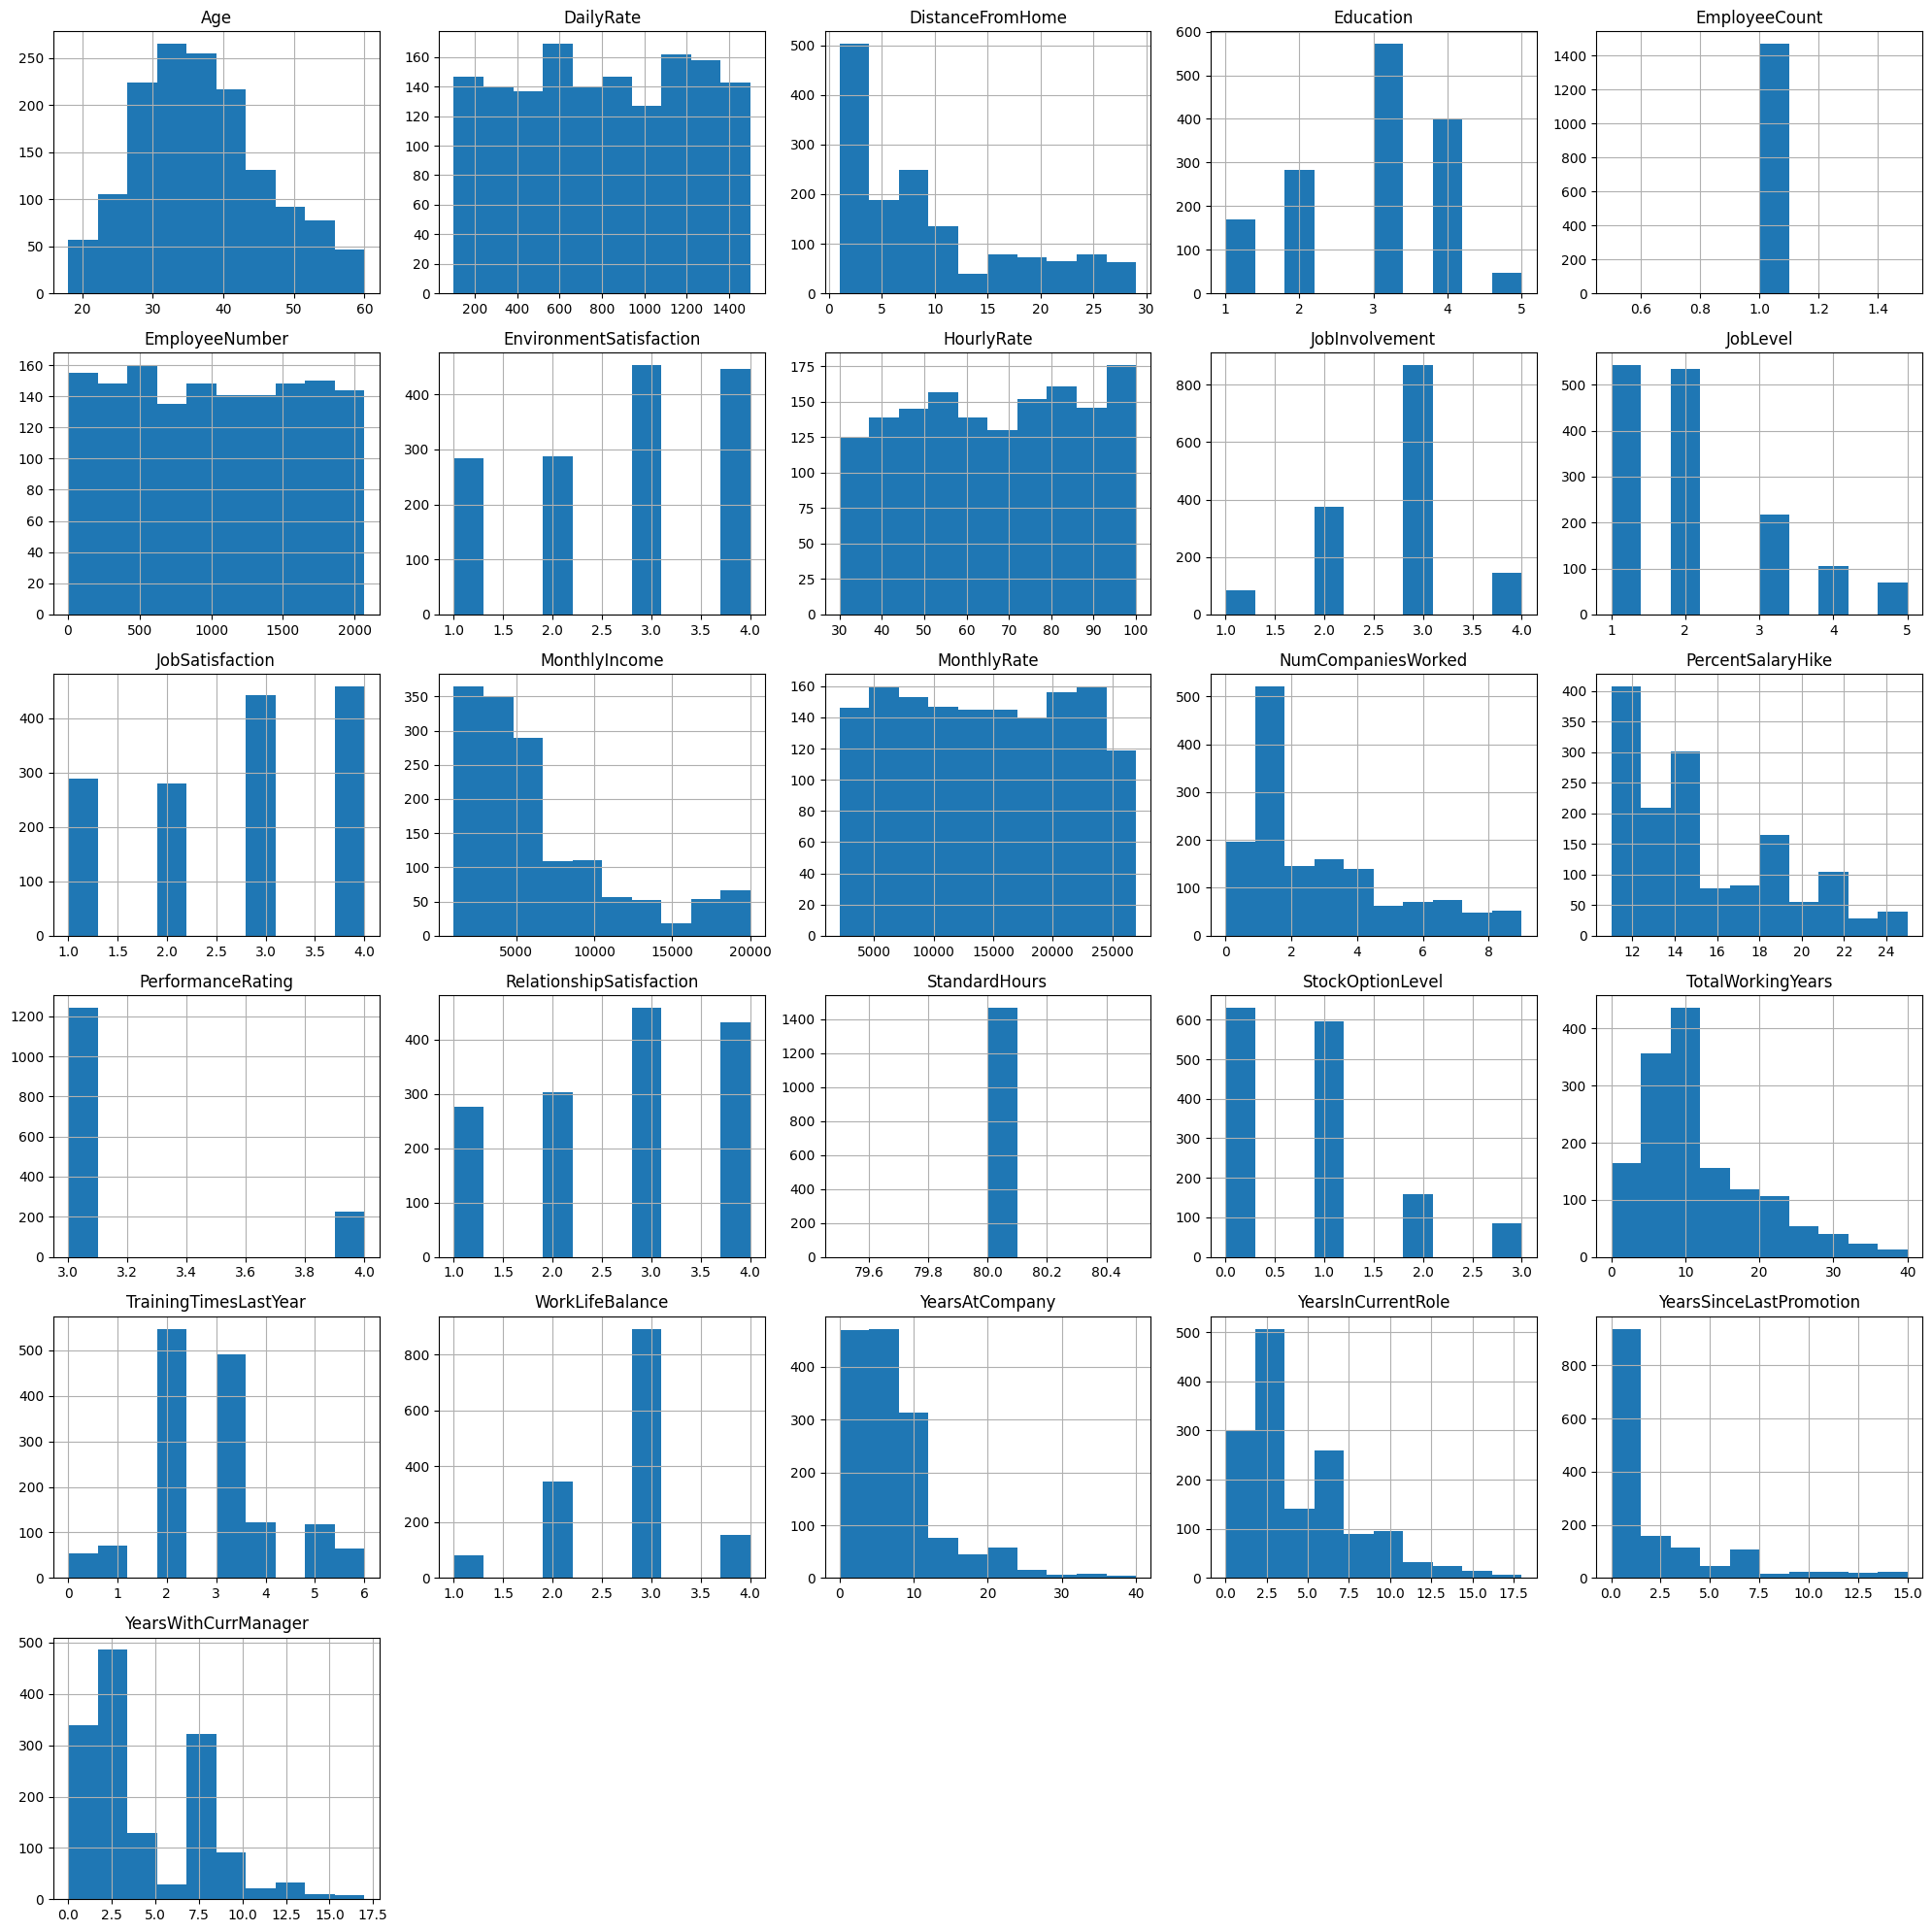

In [15]:
df.hist(figsize=(20,20))
plt.tight_layout()

###### Correlation

<li>'TotalWorkingYears' is strongly correlated with 'JobLevel' and 'MonthlyIncome'at 0.78 and 0.77 respectively</li><li>'Performance Rating' is strongly correlated with 'PercentSalaryHike' at 0.77</li>
<li>Job Level is strongly correlated with Monthly Income at 0.95 </li>
<li> Thus, we have noted that higher the Job Level, Performance Rating and Total Working Year, there is a positive correlation in Salary that a worker is earning. In addition, the rest of the variables are poorly correlated, thus it is desirable to train a predictive model with features that are not highly correlated with each other. 
</li>



/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/2621163776.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)


<AxesSubplot: >

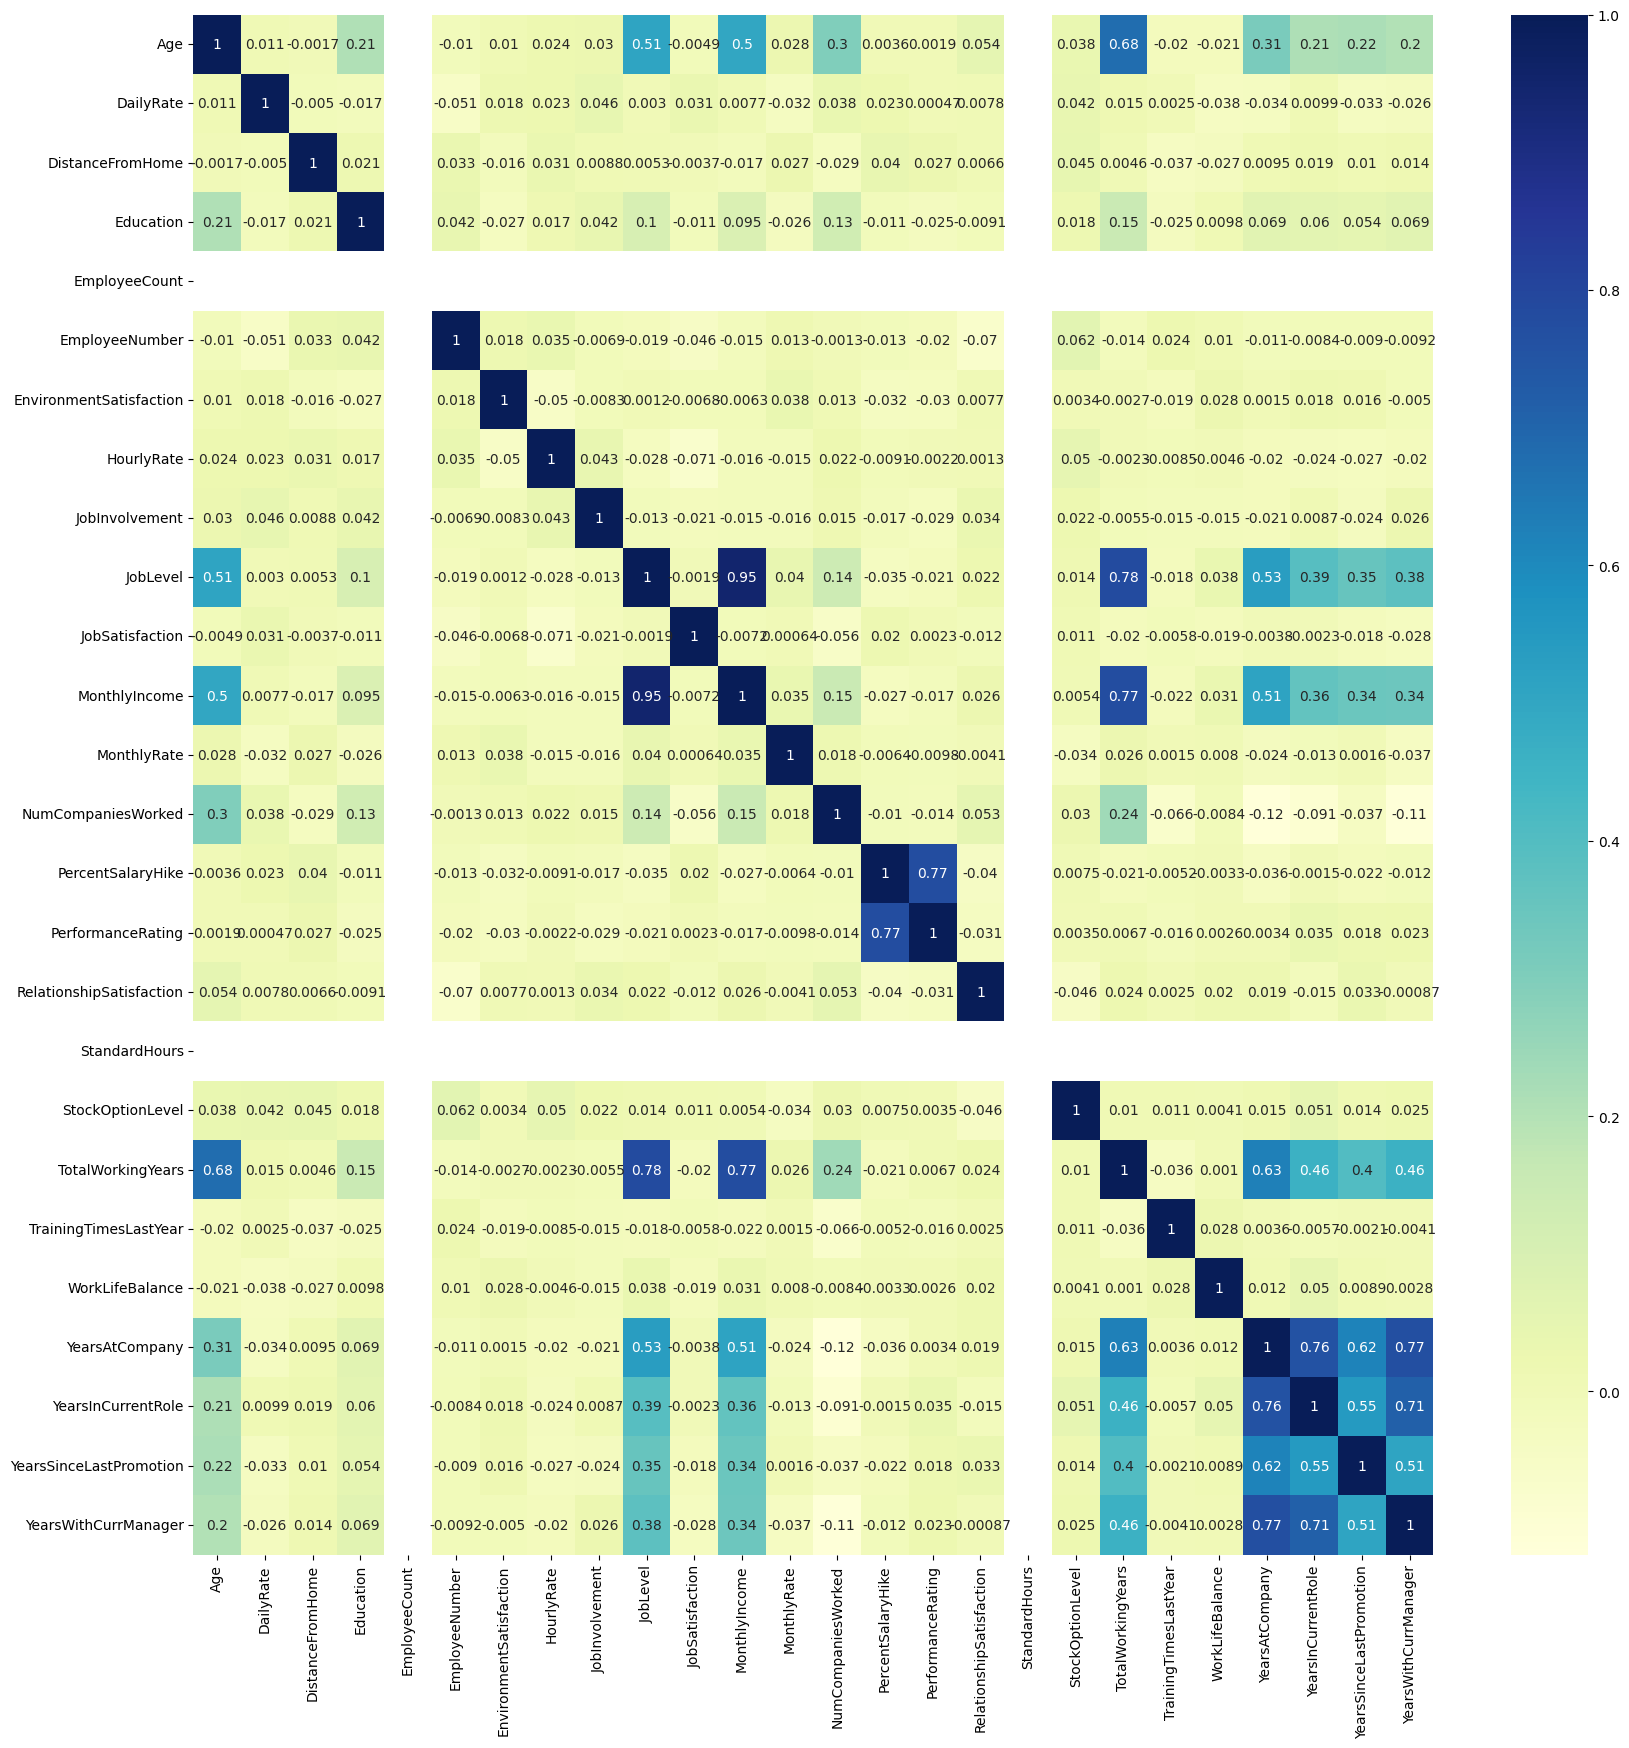

In [16]:
# let's see the correlation between the features
plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

#### Target Variable - Attrition
> only 237 out of 1470 total employee in our dataset left the company. This show that our databset is imbalance and this could raise an issue as model may be  biased towards employees who opt to stay at the company. Hence, there is a need to balance out data when before building the model 

0    1233
1     237
Name: Attrition, dtype: int64


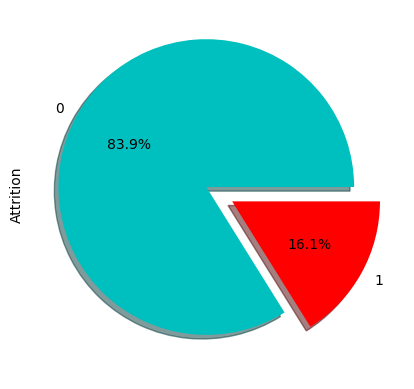

In [17]:
# 0 - 'No' | 1 - 'Yes'
dict_map = {"No": 0, "Yes": 1}
df.Attrition = df['Attrition'].map(dict_map)  
df['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(df['Attrition'].value_counts())

#### Gender vs Attrition


> <li>The ratio between numbers of males and females in the company are 1.5.</li><li>The number of males which likely to leave the firm more than number of female.</li>

Male      882
Female    588
Name: Gender, dtype: int64


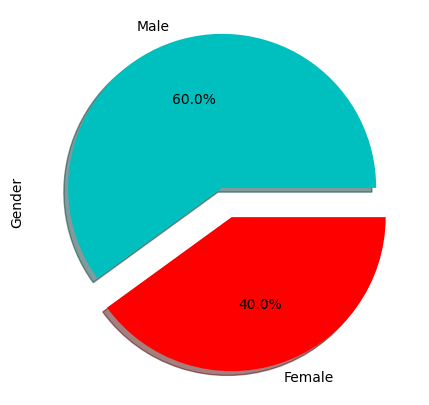

In [18]:
plt.figure(figsize=(10,5))
total = float(len(df))
#% of Gender
df['Gender'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(df['Gender'].value_counts())
plt.show()


In [19]:
# Out of the people who left, 150 are male and 87 of them are female. 

# df.head(5)
# df['Gender'].value_counts()
df['Gender'].value_counts()
print("The number of people who left the company are ", df[df["Attrition"] == 1].shape[0])
df[df['Attrition'] == 1]['Gender'].value_counts()

The number of people who left the company are  237


Male      150
Female     87
Name: Gender, dtype: int64

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/137021752.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in enumerate(df_gender["% of Leavers"].iteritems()):


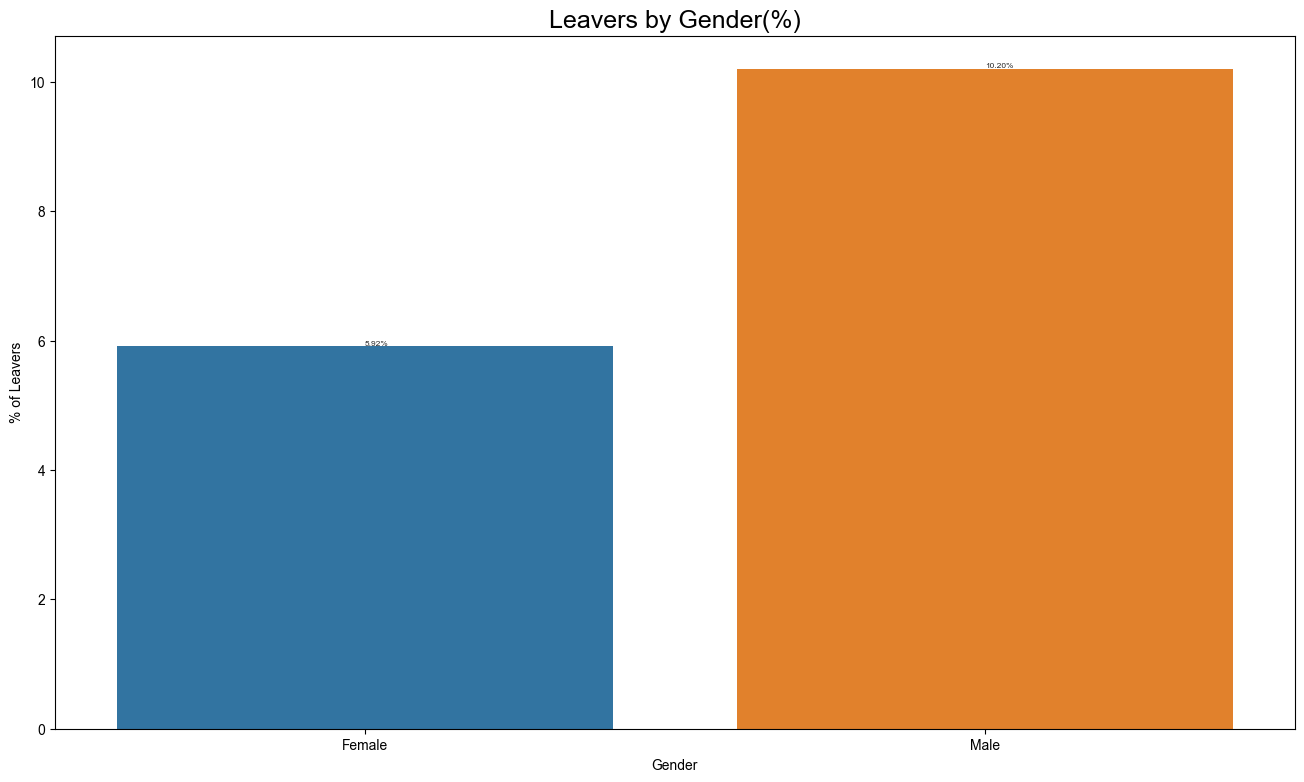

In [20]:
df_gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0
for sex in list(df['Gender'].unique()):
    ratio = df[(df['Gender']==sex)&(df['Attrition']==1)].shape[0] / df['Gender'].shape[0]
    df_gender.loc[i] = [sex, ratio*100]
    i += 1
df_gender.sort_values(by="% of Leavers", ascending=True, inplace=True)

plt.figure(figsize=(16,9))
ax = sns.barplot(x="Gender", y="% of Leavers", data=df_gender)
sns.set(font_scale=0.5)
for i, v in enumerate(df_gender["% of Leavers"].iteritems()):  
    ax.text(i,v[1], "{:,.2f}%".format(v[1]), va ='bottom', rotation=0)
plt.title("Leavers by Gender(%)", fontdict={'fontsize': 18})
plt.show()

##### Age vs Attrition

> <ul><li>The majority of employee are between 28 - 36 years old, while the range of age are 18 - 60</li><li>The Company seems to be highly depended on segment of employees younger than 40 years old</li><li>There is a concave up parabolic pattern in which the highest attrition rate is at about 28, and slowly decreases with increasing age. This is because people who are older will start looking for stability in their jobs while the younger employees are more likely to hop to other jobs to search for new opportunities. </li></ul>

Text(0.5, 1.0, 'Age Distribution by Attrition')

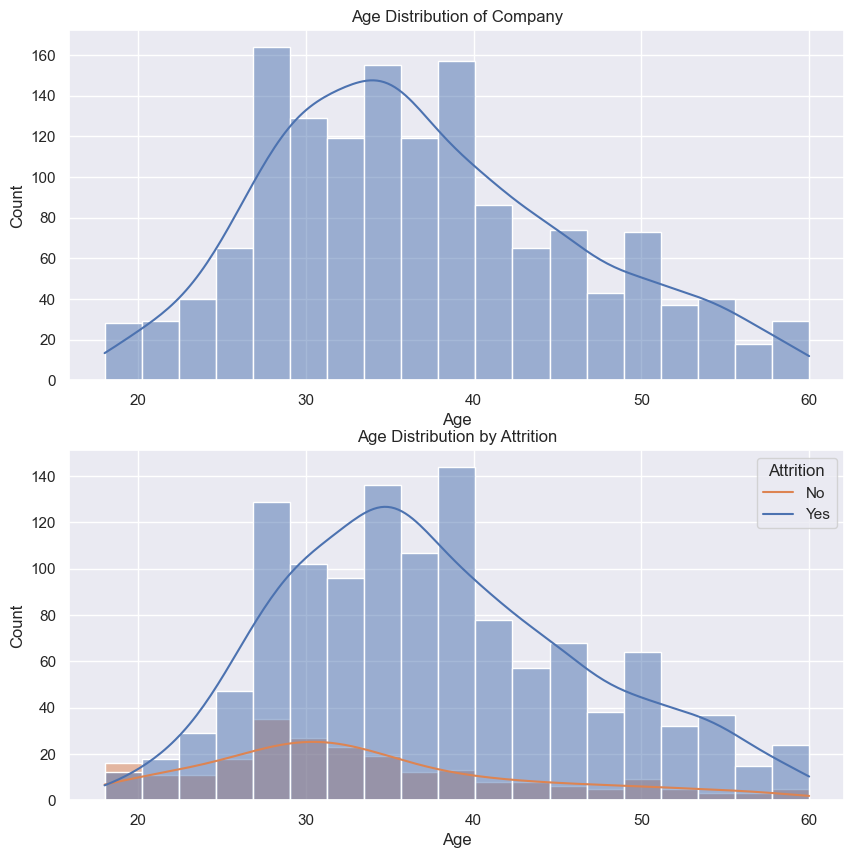

In [21]:
sns.set(font_scale=1)

plt.figure(figsize = (10, 10))
plt.subplot(2,1,1)
sns.histplot(x = 'Age', data = df, kde=True)

plt.title("Age Distribution of Company")
plt.subplot(2,1,2)


sns.histplot(x = 'Age', hue = 'Attrition', data = df, kde=True)
plt.legend(title="Attrition",labels=["No","Yes"])
plt.title("Age Distribution by Attrition")

##### Distance from Home vs Attrition

> <li>Most of the employees have a distance from home in range(1-10 km)</li><li>When the distance from home is more than 10 km, the likelihood of an employee leaving becomes higher than the employee staying on the job</li>

Text(0.5, 1.0, 'Distance From Home')

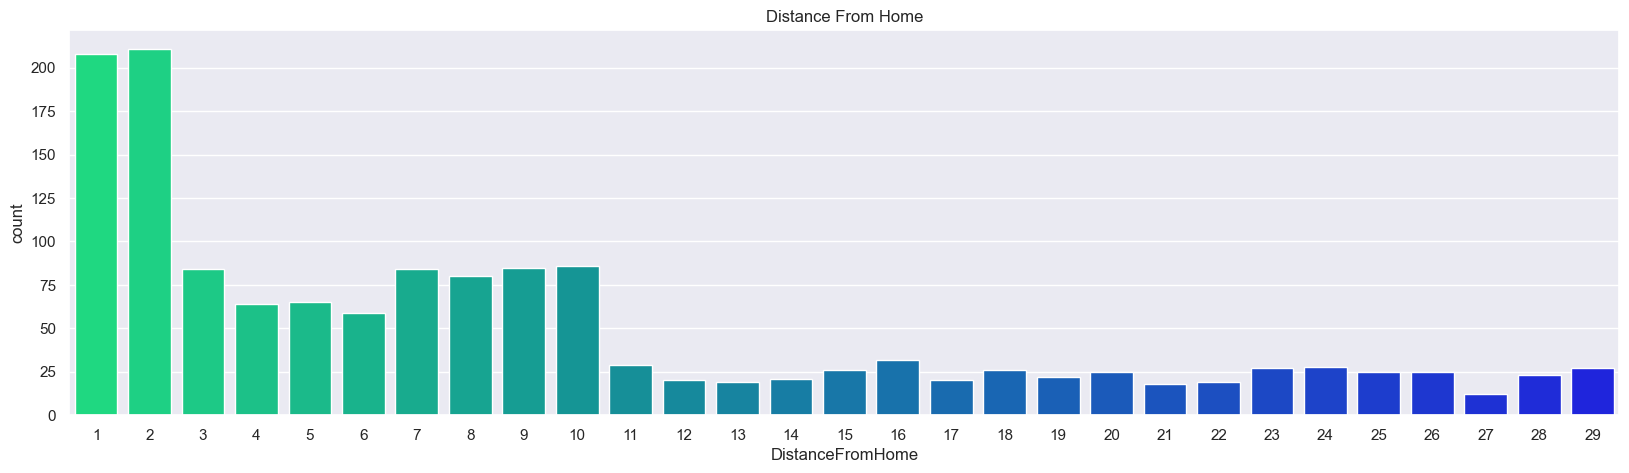

In [22]:
plt.figure(figsize = (20,5))
#plt.subplot(2,1,1)
sns.countplot(x= 'DistanceFromHome' ,data = df ,palette='winter_r')
plt.title('Distance From Home')
#plt.subplot(2,1,2)
#plt.title('Distance From Home by Attrition')
#sns.countplot(x= 'DistanceFromHome' ,data = df ,palette='winter_r'  ,hue = df['Attrition'])

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/2076936093.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'r' ).set(xlim=(0))
/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/2076936093.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'b').set(xlim=(0))


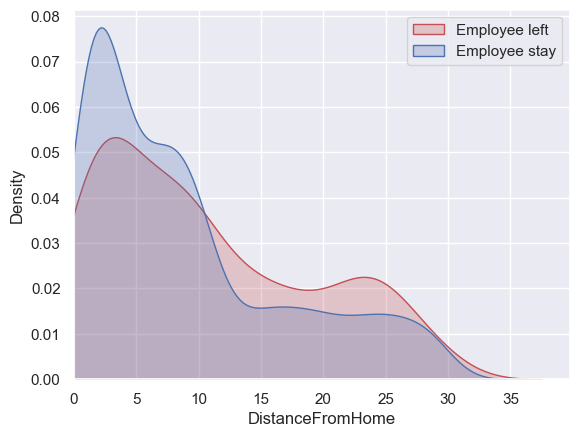

In [23]:


df_left=df[df['Attrition']==1]['DistanceFromHome'] 
df_stay=df[df['Attrition']==0]['DistanceFromHome'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'r' ).set(xlim=(0))
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'b').set(xlim=(0))
plt.legend()
plt.show()

##### Education vs Attrition
1 - 'Below College' <br>
2 - 'College' <br>
3 - 'Bachelor' <br>
4 - 'Master' <br>
5 - 'Doctor' 

> Based on the our diagrams, we noted that there is no correlation between education level and the number of people who have chosen to leave the job as the highest likelihood of employee leaving are "Below College", "Bachelor" and then "College" 

In [24]:
educationlevel = {"Attrition = Yes": [], "Attrition = No": [], "Percentage of Attrition to Stay": []}

index = ['Below College', "College", "Bachelor", "Master", "Doctoral"]

for i in range(1,6):
    # 0 is for People who stayed, 1 is for people who left 
    stayed = df[df["Education"] == i]["Attrition"].value_counts()[0]
    
    left = df[df["Education"] == i]["Attrition"].value_counts()[1]
    percentage = (left/ (left+stayed)) * 100
#     print(percentage.round(2))
    educationlevel["Attrition = Yes"].append(left)
    educationlevel["Attrition = No"].append(stayed)
    educationlevel["Percentage of Attrition to Stay"].append(str(percentage.round(2)) +" %")
    
    
education_info_table = pd.DataFrame(educationlevel, index = index)
education_info_table

,Attrition = Yes,Attrition = No,Percentage of Attrition to Stay
Below College,31,139,18.24 %
College,44,238,15.6 %
Bachelor,99,473,17.31 %
Master,58,340,14.57 %
Doctoral,5,43,10.42 %


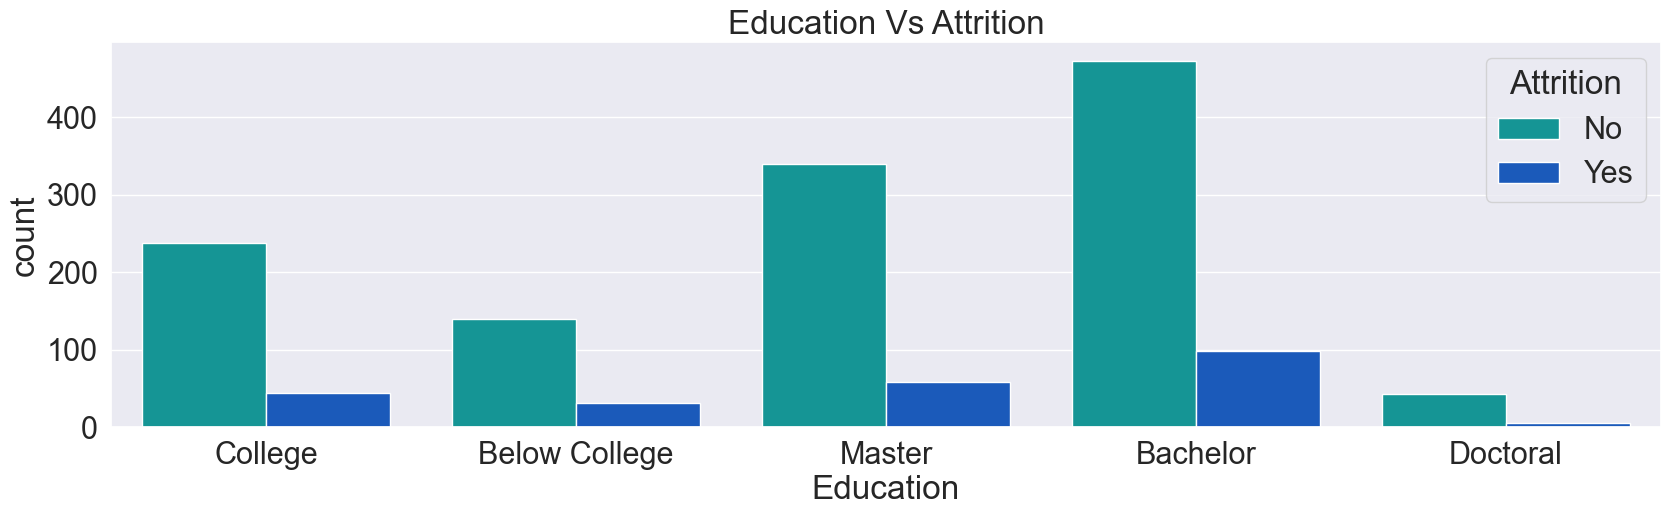

In [25]:
df['Education'] = df['Education'].replace([1,2,3,4,5],['Below College','College', 'Bachelor', 'Master', 'Doctoral'])
plt.figure(figsize = (20,5))
sns.set(font_scale=2)

sns.countplot(x = 'Education', data = df, palette = 'winter_r', hue = 'Attrition')
plt.legend(title="Attrition",labels=["No","Yes"])

plt.title('Education Vs Attrition')
plt.show()

###### Education Field

> It can be seen that Human Resource has the highest percentage of employees leaving, followed by Technical Degree and then Marketing Education Field

In [26]:
educationfield = {"Attrition = Yes": [], "Attrition = No": [], "Percentage of Attrition to Stay": []}

# df['EducationField'].value_counts()
index = ['Life Sciences', "Medical", "Marketing", "Technical Degree", "Other","Human Resources"]

# stayed = df[df["EducationField"] == "Medical"]["Attrition"].value_counts()
# df[df["EducationField"] == "Human Resources"]["Attrition"].value_counts()

for element in index:
    # 0 is for People who stayed, 1 is for people who left 
    stayed_field = df[df["EducationField"] == element]["Attrition"].value_counts()[0]
    
    left_field = df[df["EducationField"] == element]["Attrition"].value_counts()[1]
    percentage = (left_field/ (left_field+stayed_field)) * 100
    
    educationfield["Attrition = Yes"].append(left_field)
    educationfield["Attrition = No"].append(stayed_field)
    educationfield["Percentage of Attrition to Stay"].append(str(percentage.round(2)) +" %")
    
    
    

educationfield_info_table = pd.DataFrame(educationfield, index = index)
educationfield_info_table


,Attrition = Yes,Attrition = No,Percentage of Attrition to Stay
Life Sciences,89,517,14.69 %
Medical,63,401,13.58 %
Marketing,35,124,22.01 %
Technical Degree,32,100,24.24 %
Other,11,71,13.41 %
Human Resources,7,20,25.93 %


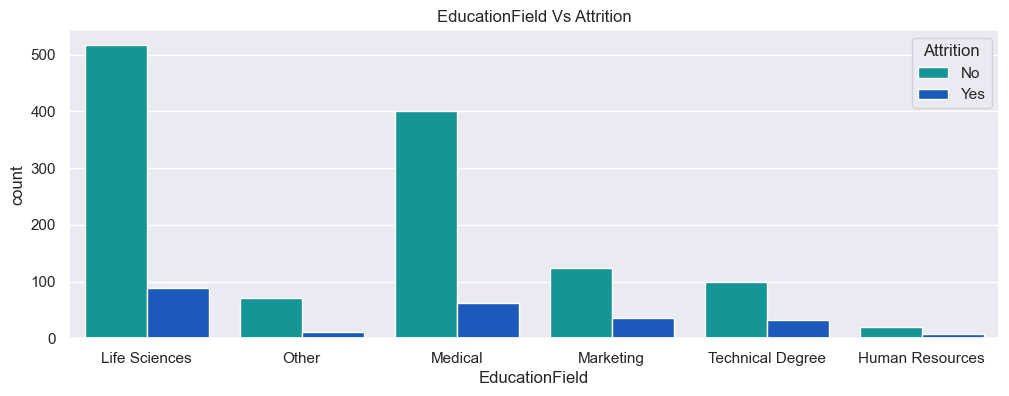

In [27]:
plt.figure(figsize=(12,4))
sns.set(font_scale=1)

sns.countplot(x = 'EducationField', data = df, palette = 'winter_r', hue = 'Attrition')
plt.title('EducationField Vs Attrition')
plt.legend(title="Attrition",labels=["No","Yes"])

plt.show()

###### Maritial Status
>Based on our Diagram, we have noted that the singles have the highest level of attrition, so we have went one step ahead to find out the Age of the Singles who have left the company, it seems to have tally with Chapter 5.33, whereby Age 28-36 still have the highest percentage of employees who have left the company. 


/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/1937749216.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in enumerate(df_MaritalStatus["% of Leavers"].iteritems()):


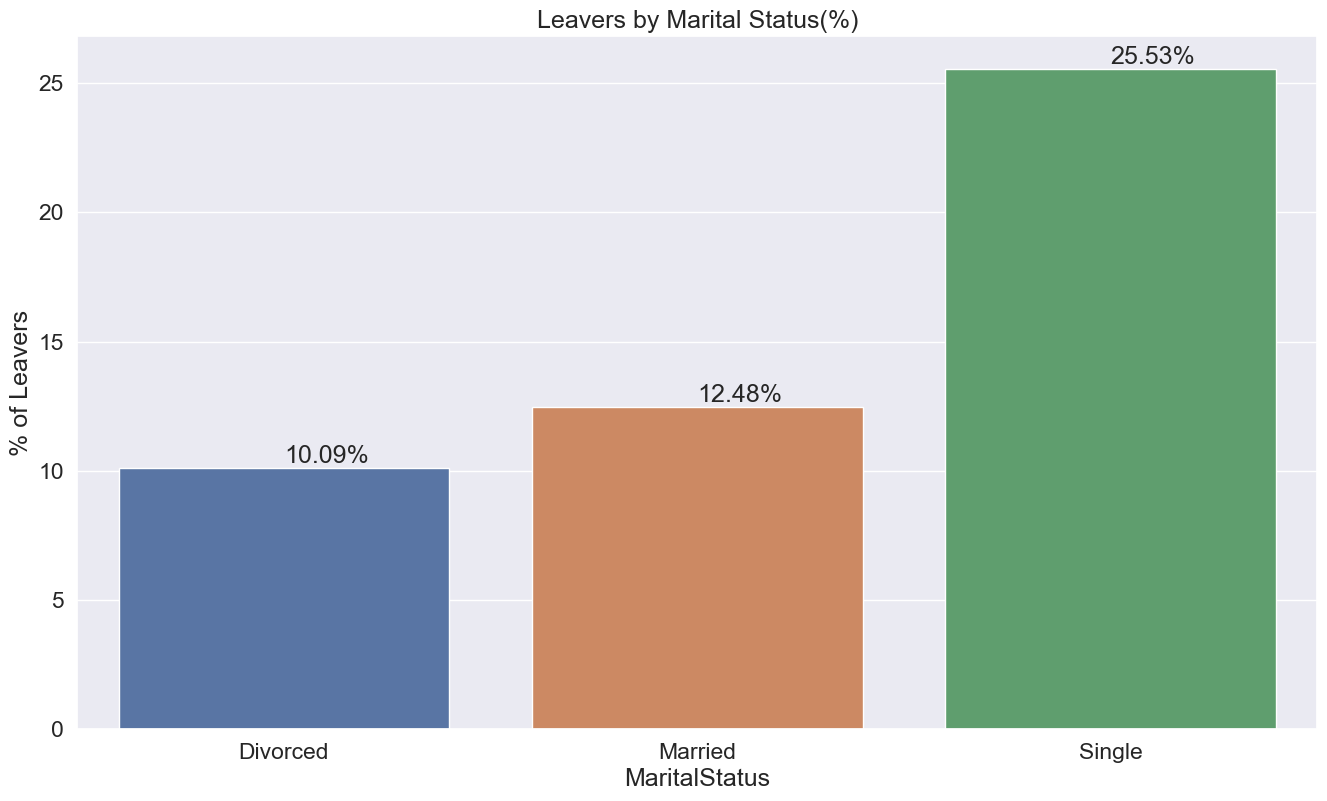

In [28]:
sns.set(font_scale=1.5)
df_MaritalStatus = pd.DataFrame(columns=["MaritalStatus", "% of Leavers"])
i=0
for status in list(df['MaritalStatus'].unique()):
    ratio = df[(df['MaritalStatus']==status)&(df['Attrition']==1)].shape[0] / df[df['MaritalStatus']==status].shape[0]
    df_MaritalStatus.loc[i] = [status, ratio*100]
    i += 1
df_MaritalStatus.sort_values(by="% of Leavers", ascending=True, inplace=True)

plt.figure(figsize=(16,9))
ax = sns.barplot(x="MaritalStatus", y="% of Leavers", data=df_MaritalStatus)
for i, v in enumerate(df_MaritalStatus["% of Leavers"].iteritems()):  
    ax.text(i,v[1], "{:,.2f}%".format(v[1]), va ='bottom', rotation=0)
plt.title("Leavers by Marital Status(%)")
plt.show()

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/3786578885.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaritalStatus_single = df[df['MaritalStatus'] == "Single"][df["Attrition"] == 1]["Age"]


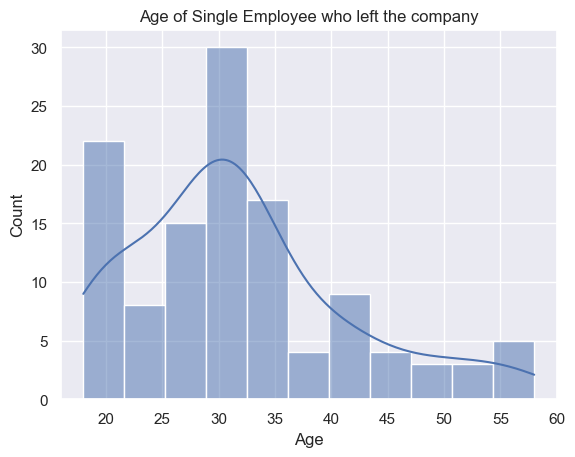

In [29]:
sns.set(font_scale=1)

MaritalStatus_single = df[df['MaritalStatus'] == "Single"][df["Attrition"] == 1]["Age"]

sns.histplot(data = MaritalStatus_single, kde=True)
# plt.legend(title="Attrition",labels=["No","Yes"])
plt.title("Age of Single Employee who left the company")
plt.show()

###### Department
>We noted that Sales has the highest level of attrition among the different departments, with a relatively close percentage with Human Resource. We went one step forward and found out the reason for the high percentage of attrition with the Employee’s Satisfaction Information. Both the HR and Sales department have the lowest average Environmental Satisfaction score and HR has the lowest job satisfaction. Thus, to resolve the high attrition rate in these departments, the Management of the company should tackle both the Job Satisfaction and Environmental Satisfaction score of these department.


In [30]:
# df["Department"].value_counts()

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/843951991.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in enumerate(df_dept["% of Leavers"].iteritems()):


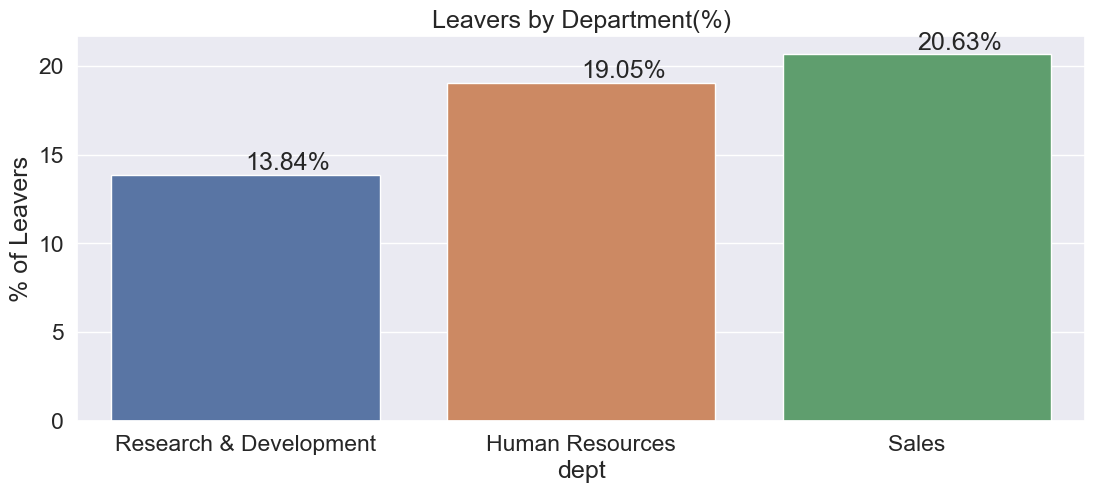

In [31]:
sns.set(font_scale=1.5)

df_dept = pd.DataFrame(columns=["dept", "% of Leavers"])
i=0
for d in list(df['Department'].unique()):
    ratio = df[(df['Department']==d)&(df['Attrition']==1)].shape[0] / df[df['Department']==d].shape[0]
    df_dept.loc[i] = [d, ratio*100]
    i += 1

df_dept.sort_values(by="% of Leavers", ascending=True, inplace=True)

plt.figure(figsize=(13,5))
ax = sns.barplot(x="dept", y="% of Leavers", data=df_dept)
for i, v in enumerate(df_dept["% of Leavers"].iteritems()):  
    ax.text(i,v[1], "{:,.2f}%".format(v[1]), va ='bottom', rotation=0)
plt.title("Leavers by Department(%)")
plt.show()

In [32]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

#### Insight 
>it can be seen that Sales Representative shows a compact distribution with income broadly lower than other roles. Sales Department has the highest average income of 6959 higher than the other departments, this would signify that Sales Department has outliers of employees earning extraordinary high salary which affected the average income of the Sales Department, which this gives us insight that Sales Department’s salary is not consistent and there are high level of deviation which may result in the high level of attrition.

In [33]:
mean_JS_score_sales = df[df['Department'] == "Sales"]['JobSatisfaction'].mean()
mean_JS_score_rnd = df[df['Department'] == "Research & Development"]['JobSatisfaction'].mean()
mean_JS_score_hr = df[df['Department'] == "Human Resources"]['JobSatisfaction'].mean()


mean_monthlyincome_sales = df[df['Department'] == "Sales"]['MonthlyIncome'].mean()
mean_monthlyincome_rnd = df[df['Department'] == "Research & Development"]['MonthlyIncome'].mean()
mean_monthlyincome_hr = df[df['Department'] == "Human Resources"]['MonthlyIncome'].mean()

mean_ES_sales = df[df['Department'] == "Sales"]['EnvironmentSatisfaction'].mean()
mean_ES_rnd = df[df['Department'] == "Research & Development"]['EnvironmentSatisfaction'].mean()
mean_ES_hr = df[df['Department'] == "Human Resources"]['EnvironmentSatisfaction'].mean()


sales_wlb_bad = df[df['Department'] == "Sales"]['WorkLifeBalance'].value_counts()[1]
sales_wlb_total = sales_wlb_bad + df[df['Department'] == "Sales"]['WorkLifeBalance'].value_counts()[2] + df[df['Department'] == "Sales"]['WorkLifeBalance'].value_counts()[3] + df[df['Department'] == "Sales"]['WorkLifeBalance'].value_counts()[4]
proportion_sales = str(round((sales_wlb_bad / sales_wlb_total) * 100,2)) +" %"

rnd_wlb_bad = df[df['Department'] == "Research & Development"]['WorkLifeBalance'][1]
rnd_wlb_total = rnd_wlb_bad + df[df['Department'] == "Research & Development"]['WorkLifeBalance'][2] + df[df['Department'] == "Research & Development"]['WorkLifeBalance'][3] + df[df['Department'] == "Research & Development"]['WorkLifeBalance'][4]
proportion_rnd = str(round((rnd_wlb_bad / rnd_wlb_total) * 100,2)) + " %"

hr_wlb_bad = df[df['Department'] == "Human Resources"]['WorkLifeBalance'].value_counts()[1]
hr_wlb_total = df[df['Department'] == "Human Resources"]['WorkLifeBalance'].value_counts()[1] + df[df['Department'] == "Human Resources"]['WorkLifeBalance'].value_counts()[2] + df[df['Department'] == "Human Resources"]['WorkLifeBalance'].value_counts()[3] + df[df['Department'] == "Human Resources"]['WorkLifeBalance'].value_counts()[4]
proportion_hr = str(round((hr_wlb_bad/hr_wlb_total) * 100,2)) +" %"

meta_department = {"Average Job Satisfaction Score": [mean_JS_score_sales,mean_JS_score_rnd,mean_JS_score_hr],
             "Average Monthly Income" : [mean_monthlyincome_sales,mean_monthlyincome_rnd,mean_monthlyincome_hr],
             'Average Environmental Satisfaction Score': [mean_ES_sales,mean_ES_rnd,mean_ES_hr],
             "Bad Work Life Balance Proportion" : [proportion_sales,proportion_rnd,proportion_hr]
            }

index = ['Sales Department', "Research & Development", "Human Resources"]

comparison_department = pd.DataFrame(meta_department,index=index)
comparison_department


,Average Job Satisfaction Score,Average Monthly Income,Average Environmental Satisfaction Score,Bad Work Life Balance Proportion
Sales Department,2.751121,6959.172646,2.679372,3.59 %
Research & Development,2.726327,6281.252862,2.744017,25.0 %
Human Resources,2.603175,6654.507937,2.682540,6.35 %


###### Job Role vs Attrition
> Sales Representative has the highest proportion of Attrition. In the previous exploration of Department attribute, we also see that highest proportion comes from sales department.


/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/3827187940.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in enumerate(df_role["% of Leavers"].iteritems()):


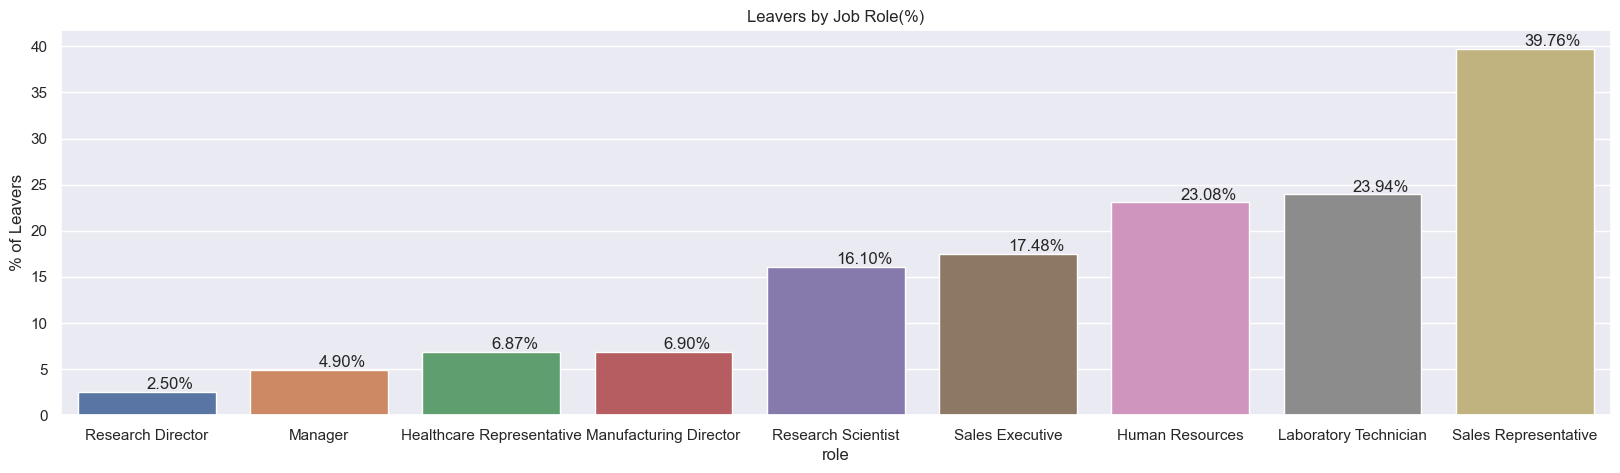

In [34]:
df_role = pd.DataFrame(columns=["role", "% of Leavers"])
i=0
for r in list(df['JobRole'].unique()):
    ratio = df[(df['JobRole']==r)&(df['Attrition']==1)].shape[0] / df[df['JobRole']==r].shape[0]
    df_role.loc[i] = [r, ratio*100]
    i += 1

df_role.sort_values(by="% of Leavers", ascending=True, inplace=True)
sns.set(font_scale=1)

plt.figure(figsize=(20,5))
ax = sns.barplot(x="role", y="% of Leavers", data=df_role)
for i, v in enumerate(df_role["% of Leavers"].iteritems()):  
    ax.text(i,v[1], "{:,.2f}%".format(v[1]), va ='bottom', rotation=0)
plt.title("Leavers by Job Role(%)")
plt.show()

> Why Sales Representative has high attrition rate? <li> Sales Representative’ shows a compact distribution, with income broadly lower than other roles</li>

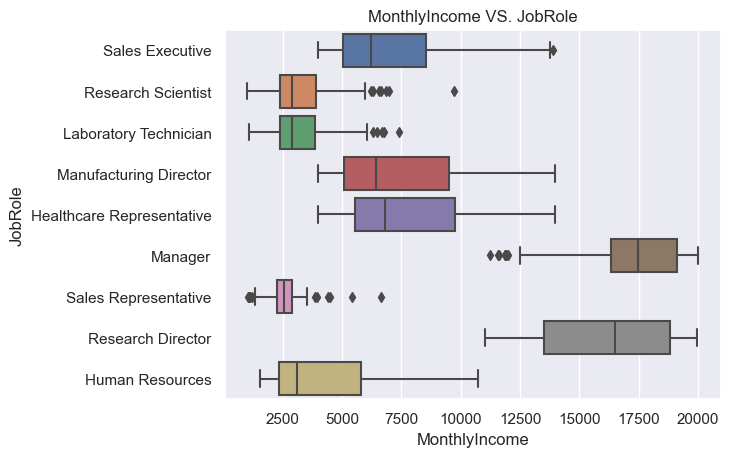

In [35]:
sns.set(font_scale=1)


plt.title('MonthlyIncome VS. JobRole')
sns.boxplot(y=df['JobRole'],x=df['MonthlyIncome'])
plt.show()

###### Overtime vs Attrition
><li>The data of Current employee shows that only 23% of them have over time commitment while among the ex-employees, there are more than half (54%) of them that have overtime commitment. </li><li>Significant larger portion of employees with OT that have left the company. Constant overtime commitment may be a strong factor for employee attrition.</li>

In [36]:
round(df.loc[df['Attrition'] == 0, 'OverTime'].value_counts(normalize=True)*100,2)

No     76.56
Yes    23.44
Name: OverTime, dtype: float64

In [37]:
round(df.loc[df['Attrition'] == 1, 'OverTime'].value_counts(normalize=True)*100,2)

Yes    53.59
No     46.41
Name: OverTime, dtype: float64

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/3299668874.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in enumerate(df_ot["% of Leavers"].iteritems()):


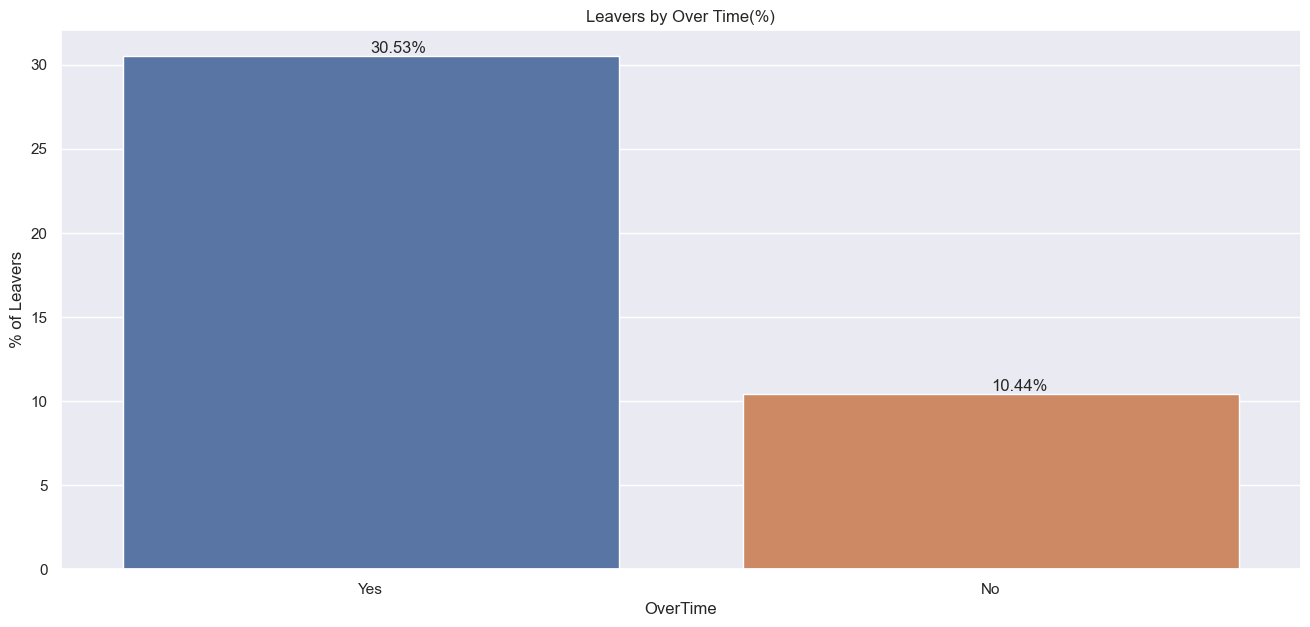

In [38]:
df_ot = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for r in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime']==r)&(df['Attrition']==1)].shape[0] / df[df['OverTime']==r].shape[0]
    df_ot.loc[i] = [r, ratio*100]
    i += 1

df_role.sort_values(by="% of Leavers", ascending=True, inplace=True)

plt.figure(figsize=(16,7))
ax = sns.barplot(x="OverTime", y="% of Leavers", data=df_ot)
for i, v in enumerate(df_ot["% of Leavers"].iteritems()):  
    ax.text(i,v[1], "{:,.2f}%".format(v[1]), va ='bottom', rotation=0)
plt.title("Leavers by Over Time(%)")
plt.show()

###### Business Travel vs Attrition

> <li>Information about how many hours of Travel is considered "Frequent" is not disclosed</li><li>There is a largest normalized proportion of Leavers for employees that travel "frequently".</li> 


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


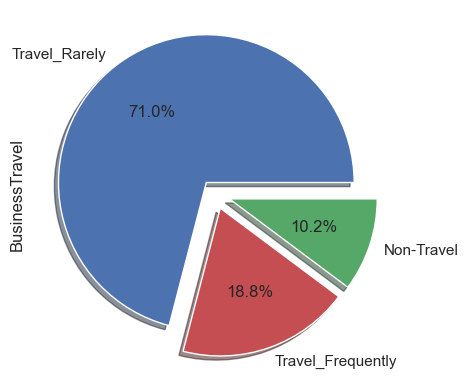

In [39]:
df['BusinessTravel'].value_counts().plot(kind='pie',explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['b','r','g'])
print(df['BusinessTravel'].value_counts())

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/3191414987.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in enumerate(df_travel["% of Leavers"].iteritems()):


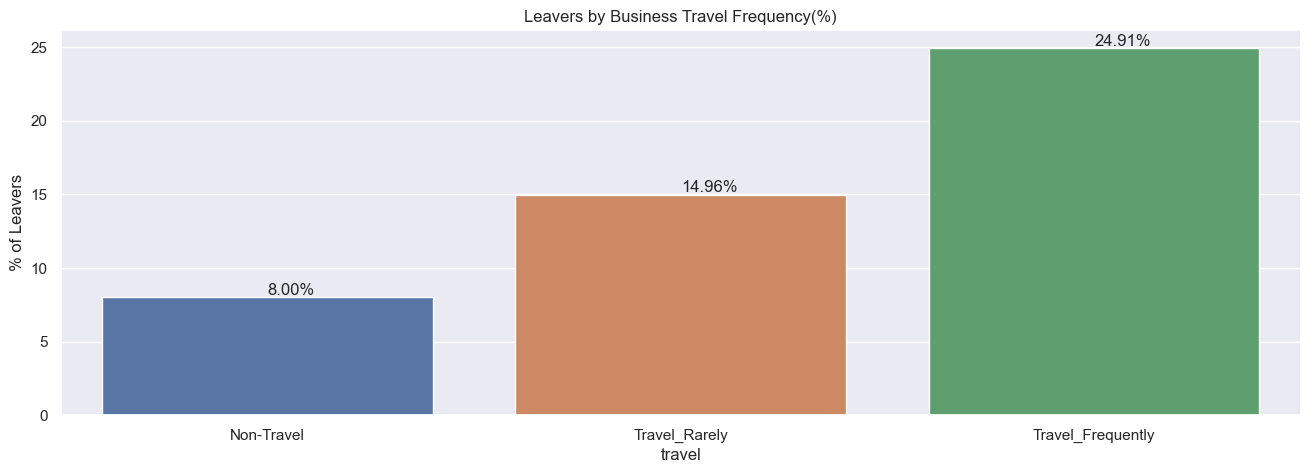

In [40]:
df_travel = pd.DataFrame(columns=["travel", "% of Leavers"])
i=0
for d in list(df['BusinessTravel'].unique()):
    ratio = df[(df['BusinessTravel']==d)&(df['Attrition']==1)].shape[0] / df[df['BusinessTravel']==d].shape[0]
    df_travel.loc[i] = [d, ratio*100]
    i += 1

df_travel.sort_values(by="% of Leavers", ascending=True, inplace=True)

plt.figure(figsize=(16,5))
ax = sns.barplot(x="travel", y="% of Leavers", data=df_travel)
for i, v in enumerate(df_travel["% of Leavers"].iteritems()):  
    ax.text(i,v[1], "{:,.2f}%".format(v[1]), va ='bottom', rotation=0)
plt.title("Leavers by Business Travel Frequency(%)")
plt.show()

##### Job Involvement vs Attrition
1 - 'Low' <br>
2 - 'Medium' <br>
3 - 'High' <br>
4 - 'Very High'

><li> Most of the employees considered their involvement with their jobs as High.</li><li>There is a negative correlation with the Job Involvement of an employee and the Attrition where by employees with higher Job Involvement are less likely to leave.

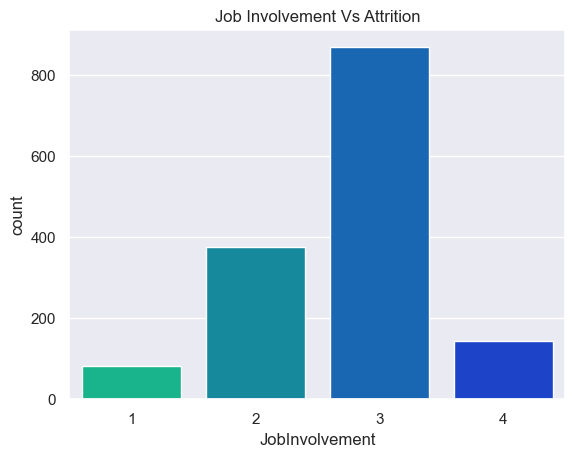

In [41]:
#df['JobInvolvement'] = df['JobInvolvement'].replace([1,2,3,4],['Low','Medium', 'High', 'Very High'])
sns.countplot(x ='JobInvolvement', data = df, palette = 'winter_r')
plt.title('Job Involvement Vs Attrition')
plt.show()

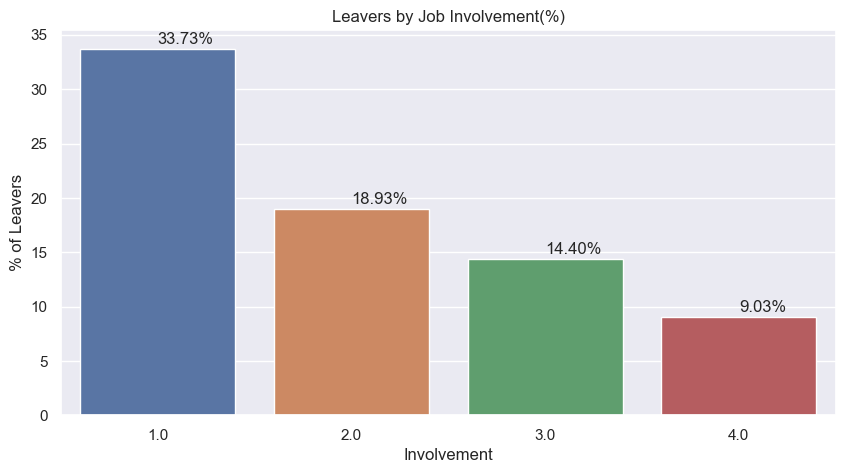

In [42]:
df_JobInvolvement = pd.DataFrame(columns=["Involvement", "% of Leavers"])
i=0
for d in list(df['JobInvolvement'].unique()):
    ratio = df[(df['JobInvolvement']==d)&(df['Attrition']==1)].shape[0] / df[df['JobInvolvement']==d].shape[0]
    df_JobInvolvement.loc[i] = [d, ratio*100]
    i += 1

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Involvement", y="% of Leavers", data=df_JobInvolvement)
for i in range(1,len(df_JobInvolvement)+1):
    text = df_JobInvolvement[df_JobInvolvement["Involvement"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i-1,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Job Involvement(%)")
plt.show()

##### Job Satisfaction, Employee Satisfaction, Relationship Satisfaction
1 - 'Low' <br>
2 - 'Medium' <br>
3 - 'High' <br>
4 - 'Very High'

> <li> For the employees who left the organisation, the Job, Relationship and Environment satisfaction where largely at 1 (Low) </li><li>We can see that low satisfaction has the highest proportion while very high satisfaction has the lowest proportion of Attrition </li>


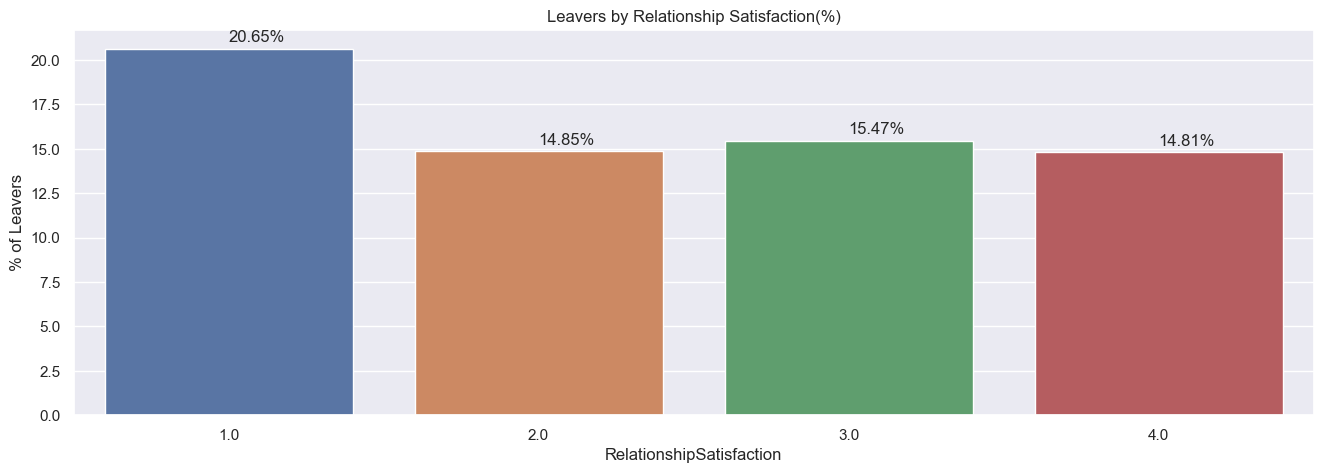

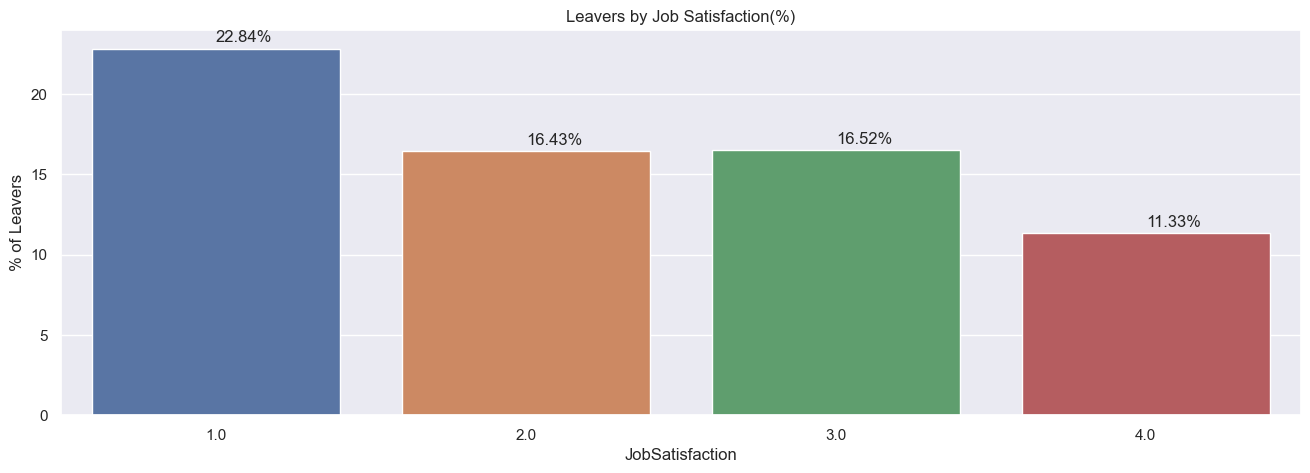

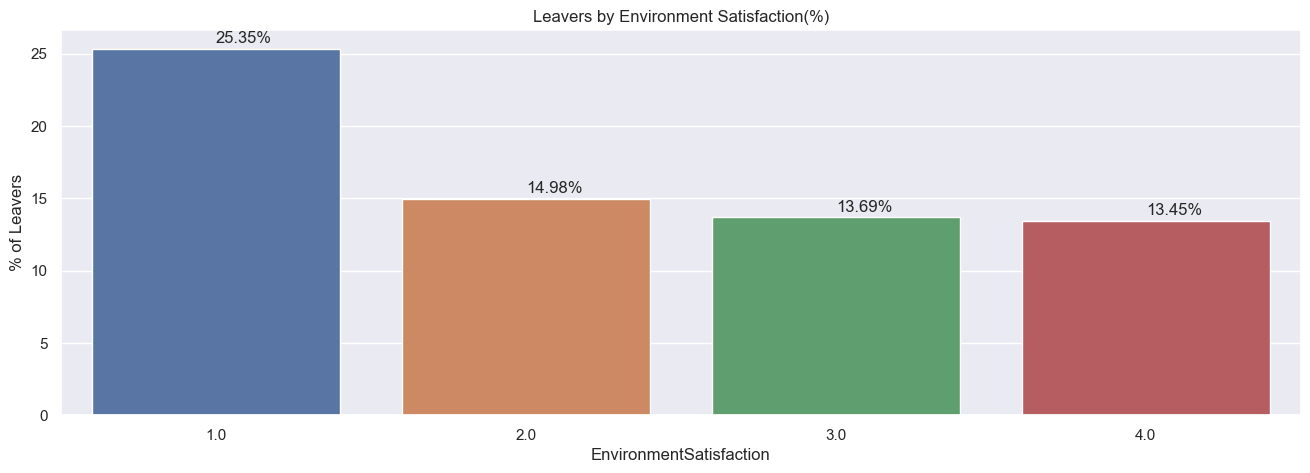

In [43]:
df_rs = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for d in list(df['RelationshipSatisfaction'].unique()):
    ratio = df[(df['RelationshipSatisfaction']==d)&(df['Attrition']==1)].shape[0] / df[df['RelationshipSatisfaction']==d].shape[0]
    df_rs.loc[i] = [d, ratio*100]
    i += 1
    
plt.figure(figsize=(16,5))
ax = sns.barplot(x="RelationshipSatisfaction", y="% of Leavers", data=df_rs)
for i in range(1,len(df_rs)+1):
    text = df_rs[df_rs["RelationshipSatisfaction"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i-1,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Relationship Satisfaction(%)")
plt.show()

#############

df_js = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for d in list(df['JobSatisfaction'].unique()):
    ratio = df[(df['JobSatisfaction']==d)&(df['Attrition']==1)].shape[0] / df[df['JobSatisfaction']==d].shape[0]
    df_js.loc[i] = [d, ratio*100]
    i += 1
    
plt.figure(figsize=(16,5))
ax = sns.barplot(x="JobSatisfaction", y="% of Leavers", data=df_js)
for i in range(1,len(df_js)+1):
    text = df_js[df_js["JobSatisfaction"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i-1,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Job Satisfaction(%)")
plt.show()

#############

df_es = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i=0
for d in list(df['EnvironmentSatisfaction'].unique()):
    ratio = df[(df['EnvironmentSatisfaction']==d)&(df['Attrition']==1)].shape[0] / df[df['EnvironmentSatisfaction']==d].shape[0]
    df_es.loc[i] = [d, ratio*100]
    i += 1
    
plt.figure(figsize=(16,5))
ax = sns.barplot(x="EnvironmentSatisfaction", y="% of Leavers", data=df_es)
for i in range(1,len(df_es)+1):
    text = df_es[df_es["EnvironmentSatisfaction"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i-1,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Environment Satisfaction(%)")
plt.show()

##### Performance Rating vs Attrition
1 - 'Low' <br>
2 - 'Good' <br>
3 - 'Excellent' <br>
4 - 'Outstanding'

> <li> We can see that there is no employee with performance rating below excellent </li><li> <mark>might be able to remove this attribute </mark> </li>

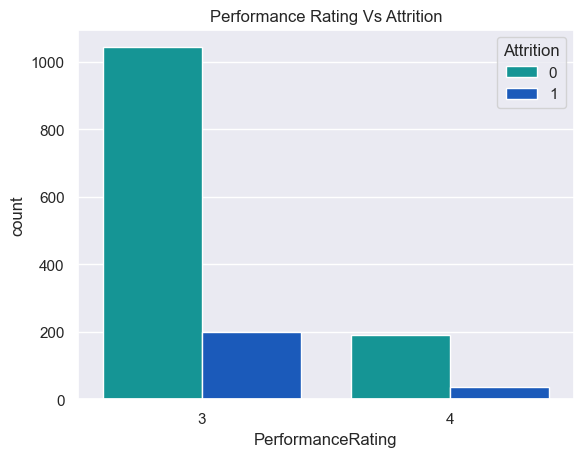

In [44]:
#df['PerformanceRating'] = df['PerformanceRating'].replace([1,2,3,4],['Low','Good', 'Excellent', 'Outstanding'])
sns.countplot(x = 'PerformanceRating', data = df, palette = 'winter_r', hue = 'Attrition')
plt.title('Performance Rating Vs Attrition')
plt.show()

##### Worklife Balance vs Attrition
1 - 'Bad' <br>
2 - 'Good' <br>
3 - 'Better' <br>
4 - 'Best'

>The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.

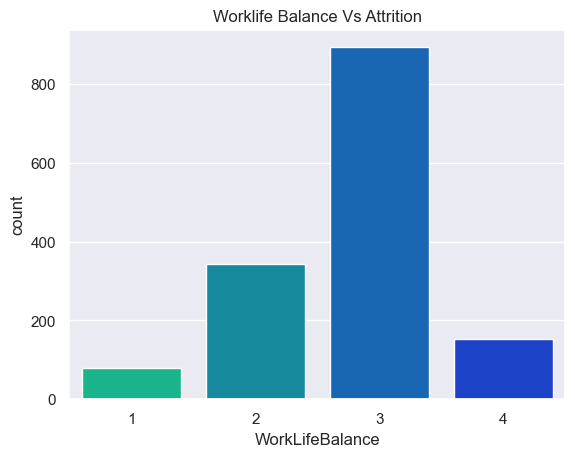

In [45]:
#df['WorkLifeBalance`'] = df['WorkLifeBalance'].replace([1,2,3,4], ['Bad','Good', 'Better', 'Best'])
sns.countplot(x = 'WorkLifeBalance', data = df, palette = 'winter_r')
plt.title('Worklife Balance Vs Attrition')
plt.show()

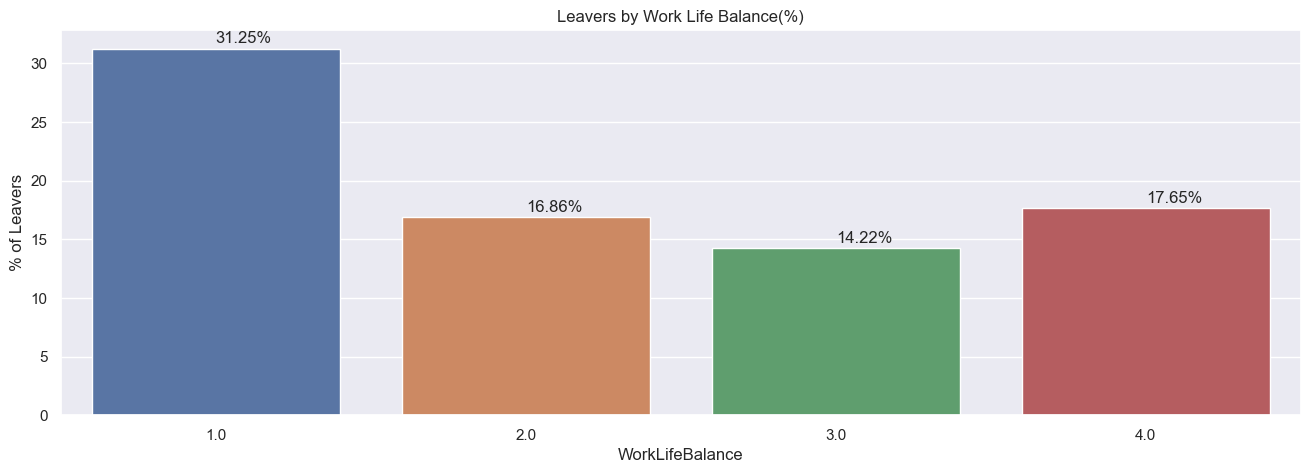

In [46]:
df_wfb = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for d in list(df['WorkLifeBalance'].unique()):
    ratio = df[(df['WorkLifeBalance']==d)&(df['Attrition']==1)].shape[0] / df[df['WorkLifeBalance']==d].shape[0]
    df_wfb.loc[i] = [d, ratio*100]
    i += 1
    
plt.figure(figsize=(16,5))
ax = sns.barplot(x="WorkLifeBalance", y="% of Leavers", data=df_wfb)
for i in range(1,len(df_wfb)+1):
    text = df_wfb[df_wfb["WorkLifeBalance"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i-1,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Work Life Balance(%)")
plt.show()

###### YearsWithCurrManager vs Attrition

>We can see more employees tend to leave with less than 2 years with the current managers and tend to stay if having more than 5 years experience

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/3746417148.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'r' ).set(xlim=(0))
/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/3746417148.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'g').set(xlim=(0))


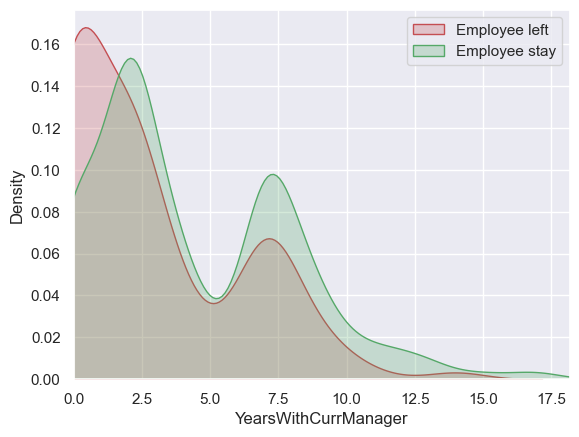

In [47]:
df_left=df[df['Attrition']==1]['YearsWithCurrManager'] 
df_stay=df[df['Attrition']==0]['YearsWithCurrManager'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'r' ).set(xlim=(0))
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'g').set(xlim=(0))
plt.legend()
plt.show()

###### TotalWorkingYears, YearsInCurrentRole, YearsAtCompany, TrainingTimesLastYear vs Attrition

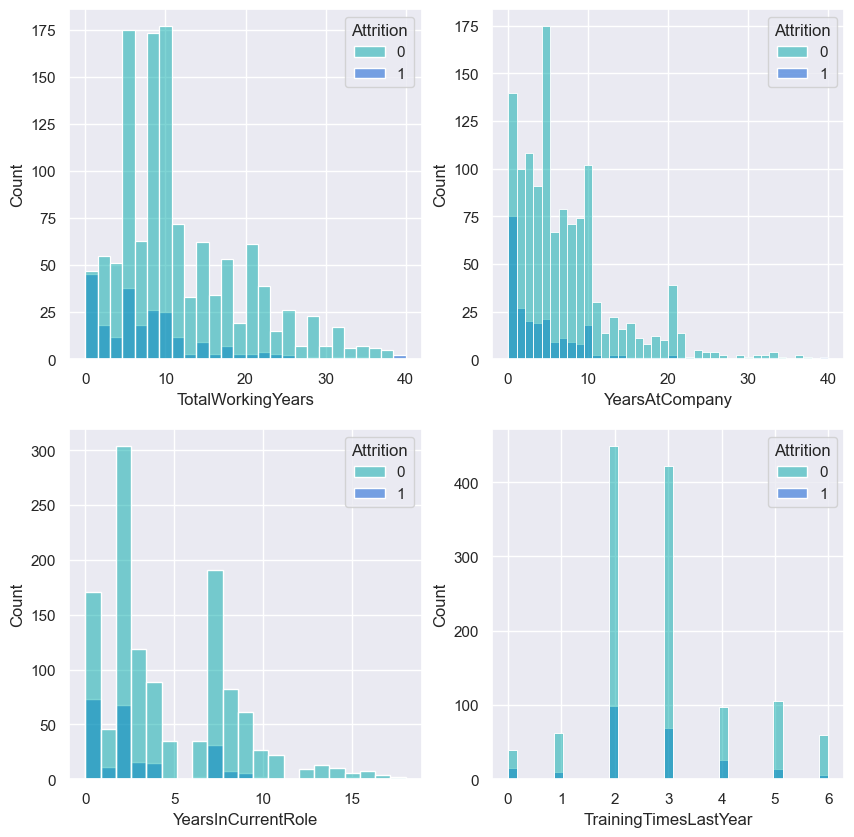

In [48]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x= 'TotalWorkingYears' ,data =df ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,2)
sns.histplot(x= 'YearsAtCompany' ,data =df ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,3)
sns.histplot(x= 'YearsInCurrentRole' ,data =df ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,4)
sns.histplot(x= 'TrainingTimesLastYear' ,data =df ,palette='winter_r',hue='Attrition')
plt.show()

###### YearsSinceLastPromotion

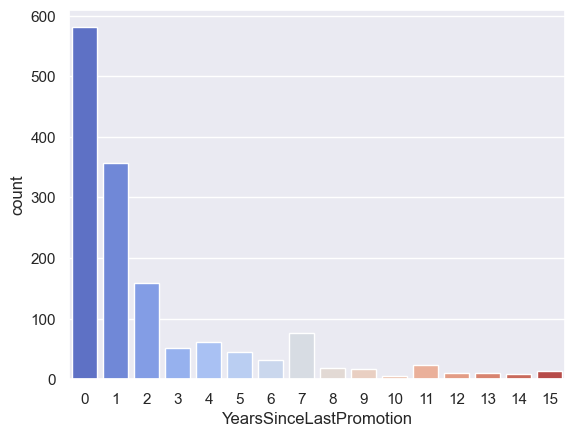

In [49]:
b=sns.countplot(x= 'YearsSinceLastPromotion' ,data = df ,palette='coolwarm'  )
plt.show()

###### NumCompaniesWorked

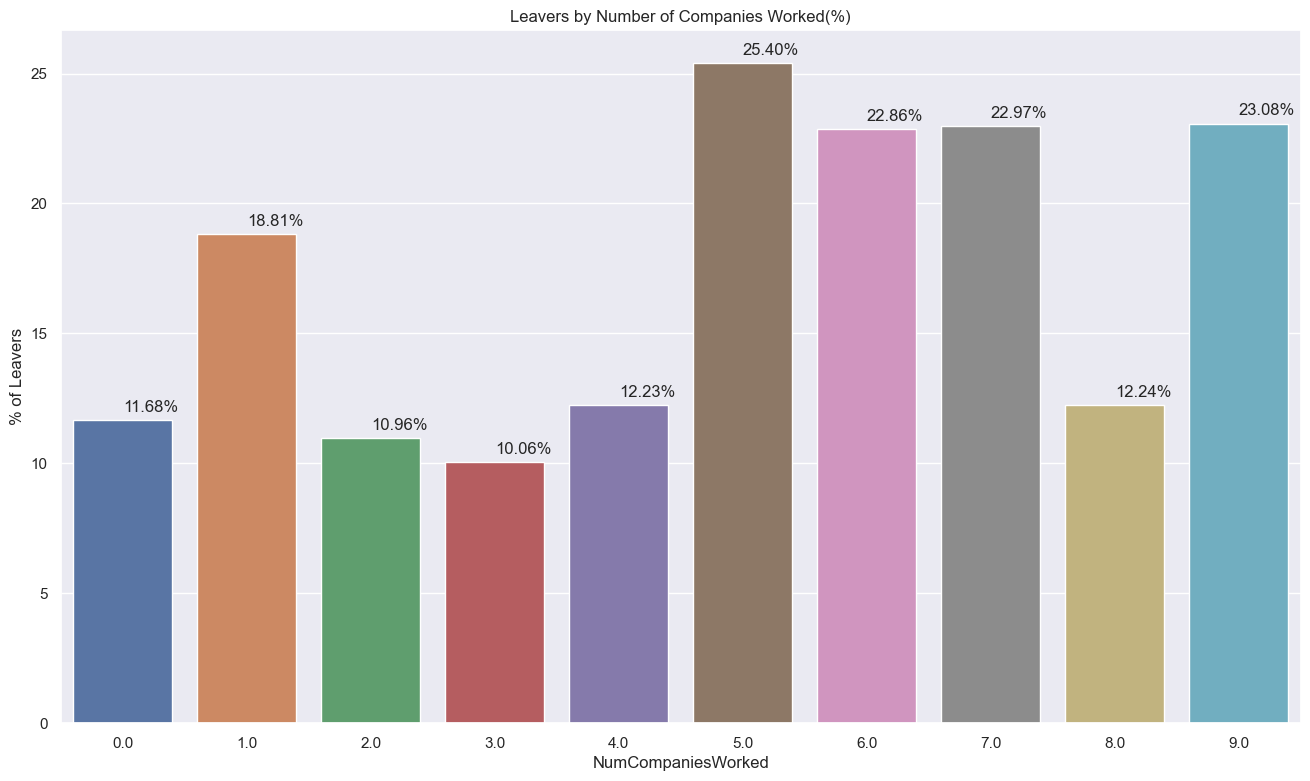

In [50]:
df_ncw = pd.DataFrame(columns=["NumCompaniesWorked", "% of Leavers"])
i=0
for d in list(df['NumCompaniesWorked'].unique()):
    ratio = df[(df['NumCompaniesWorked']==d)&(df['Attrition']==1)].shape[0] / df[df['NumCompaniesWorked']==d].shape[0]
    df_ncw.loc[i] = [d, ratio*100]
    i += 1

plt.figure(figsize=(16,9))
ax = sns.barplot(x="NumCompaniesWorked", y="% of Leavers", data=df_ncw)
for i in range(0,len(df_ncw)):
    text = df_ncw[df_ncw["NumCompaniesWorked"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Number of Companies Worked(%)")
plt.show()

###### Monthly Income vs Attrition

> A large majority of low monthly income tends to leave than the group of high monthly income.

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/4166984652.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'y' ).set(xlim=(0))
/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/4166984652.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'b').set(xlim=(0))


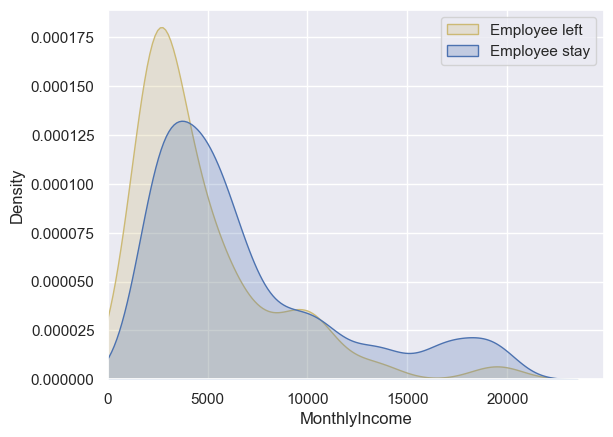

In [51]:
df_left=df[df[ 'Attrition']==1]['MonthlyIncome'] 
df_stay=df[df[ 'Attrition']==0]['MonthlyIncome'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'y' ).set(xlim=(0))
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'b').set(xlim=(0))
plt.legend()
plt.show()

###### PercentSalaryHike

> Higher percentage hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a  that of a good hike.

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_1595/2747428398.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


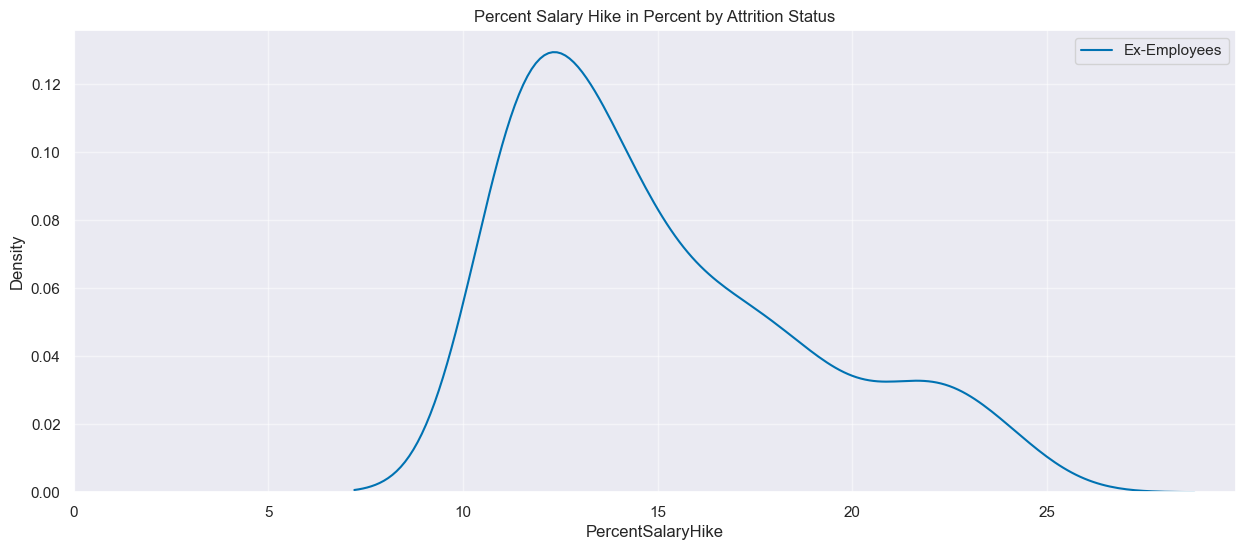

In [52]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
#sns.kdeplot(df.loc[df['Attrition'] == 0, 'PercentSalaryHike'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 1, 'PercentSalaryHike'], label = 'Ex-Employees')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=0)
plt.ylabel('Density')
plt.legend()
plt.title('Percent Salary Hike in Percent by Attrition Status');

###### StockOptionLevel vs Attrition

> The tendency of employees to leave the organization is much more when the stock availing options are limited. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stock options have a freedom to leave the organization at will.

In [53]:
df.loc[df['Attrition'] == 1, 'StockOptionLevel'].value_counts()

0    154
1     56
3     15
2     12
Name: StockOptionLevel, dtype: int64

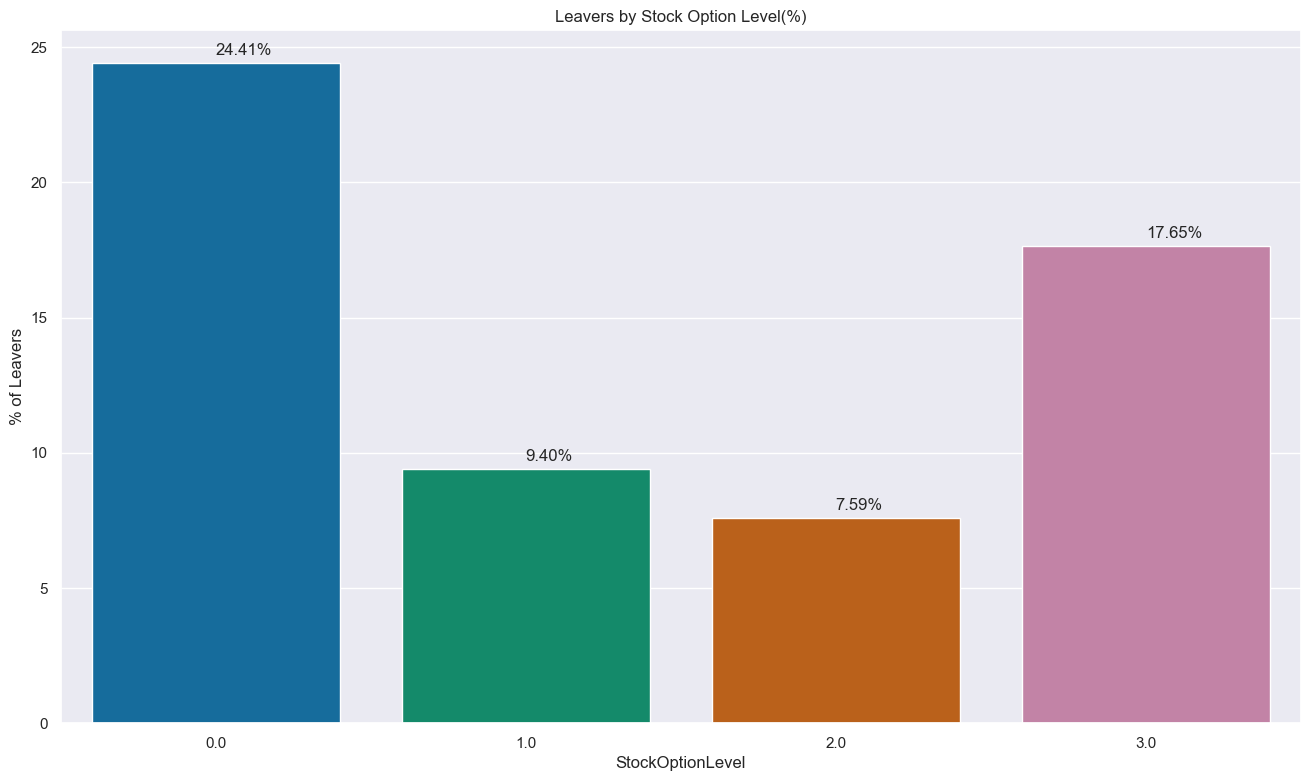

In [54]:
df_sol = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i=0
for d in list(df['StockOptionLevel'].unique()):
    ratio = df[(df['StockOptionLevel']==d)&(df['Attrition']==1)].shape[0] / df[df['StockOptionLevel']==d].shape[0]
    df_sol.loc[i] = [d, ratio*100]
    i += 1

plt.figure(figsize=(16,9))
ax = sns.barplot(x="StockOptionLevel", y="% of Leavers", data=df_sol)
for i in range(0,len(df_sol)):
    text = df_sol[df_sol["StockOptionLevel"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Stock Option Level(%)")
plt.show()

### Summary from EDA

<mark>About the dataset </mark>
<ul>
    <li>The dataset does not feature any missing, duplicate or erroneous data values, and all features are of the correct data type.</li>
    <li>The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.</li>
    <li>Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.</li>
</ul>

In the literature review by Dr. Shivani on "Review on literacture factors influencing attrition and retention", it is stated that many variables like salary, age, tenure, gender, job satisfaction, availability of suitable opportunities, workplace social support, location, quality of work life, have been studied and they have been found as playing an important role in the increasing or decreasing attrition trend. 

From our EDA findings below, some of these aforementioned factors shows clear result of affecting attrition

<mark>Findings</mark>
<ul>
    <li> <strong>Gender:</strong> Males have a higher rate of attrition. </li>
    <li> <strong>Age:</strong> People are tending to switch to a different jobs at the start of their careers, or at the earlier parts of it. Once they have settled with a family or have found stability in their jobs, they tend to stay long in the same organization- only going for vertical movements in the same organization</li>
    <li><strong>Salary:</strong> A large majority of low monthly income tends to leave than the group of high monthly income.</li>
    <li><strong>Job Role:</strong> Sales Representative tends to leave more other roles because they have lower income compared with other roles.</li>
    <li><strong>NumCompaniesWorked:</strong> Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.</li>
    <li><strong>DistanceFromHome:</strong>More employees tend to leave when the distance from home is more than 10 km.</li>
    <li><strong>Satisfaction:</strong> Employees that are dissatisfied with the environment conditions, relationship and JobSatisfaction tend to leave more compared with other.</li>
    <li><strong>OverTime: </strong>People who have to work overtime show higher proportion of leavers compared to their counterparts.</li>
    <li><strong>Job Involvement: </strong> Employees with higher Job Involvement are less likely to leave.</li>
    <li><strong>Years at Company: </strong>More employees tend to leave with less than 5 years in the company</li>
    <li><strong>Department: </strong>Human Resource and Sales faced the highest attrition level. This is attributed to Work Life balance and Environment Satisfaction problems.</li>
    <li><strong>Education: </strong>There is no correlation between education level and attrition rate.</li>
    <li><strong>Education Field: </strong>Employees who studied “Human Resource” have the highest level of attrition</li>
</ul>

<hr>